In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import env

from sklearn.model_selection import train_test_split
import sklearn.preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
# connection function for accessing mysql 
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
def split_data(df, stratify_by=""):
    '''
    take in a DataFrame and return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

In [4]:
# Acquire

query = """
select * 
from properties_2017
join predictions_2017 using(parcelid)
where transactiondate between "2017-05-01" and "2017-06-30"
and unitcnt = 1;
"""

df = pd.read_sql(query, get_connection('zillow'))
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,11289917,2061546,1.0,None,None,2.0,3.0,NaN,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
1,11705026,1834372,NaN,None,None,1.0,2.0,NaN,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,1772,-0.146056,2017-06-30
2,11389003,2121349,NaN,None,None,2.0,3.0,NaN,6.0,2.0,...,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,3273,-0.325393,2017-06-01
3,11967869,2093710,NaN,None,None,1.0,2.0,NaN,5.0,1.0,...,274237.0,2016.0,191821.0,3267.47,None,NaN,6.037185e+13,3429,-0.005566,2017-06-29
4,12035176,1288537,NaN,None,None,1.0,1.0,NaN,11.0,1.0,...,245906.0,2016.0,146810.0,2926.19,None,NaN,6.037189e+13,5444,-0.114435,2017-05-24


In [5]:
# Prepare
df = df.rename(columns={"bedroomcnt": "bedrooms", 
                        "bathroomcnt": "bathrooms", 
                        "calculatedfinishedsquarefeet": "square_feet", 
                        "taxamount": "taxes", "taxvaluedollarcnt": "tax_value"})

In [6]:
features = [
    "parcelid",
    "bedrooms",
    "bathrooms",
    "square_feet",
    "tax_value"
]

df = df[features]
df = df.set_index("parcelid")

# Let's drop the nulls
df = df.dropna()

In [7]:
train, validate, test = split_data(df, stratify_by="tax_value")

In [8]:
train.head()

,bedrooms,bathrooms,square_feet,tax_value
parcelid,,,,
11063835,3.0,2.0,2512.0,119038.0
12464049,2.0,2.0,1253.0,336961.0
11056435,3.0,2.0,1477.0,310574.0
11644296,3.0,3.0,3006.0,813831.0
12543949,2.0,1.0,986.0,243459.0


### Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [9]:
import explore

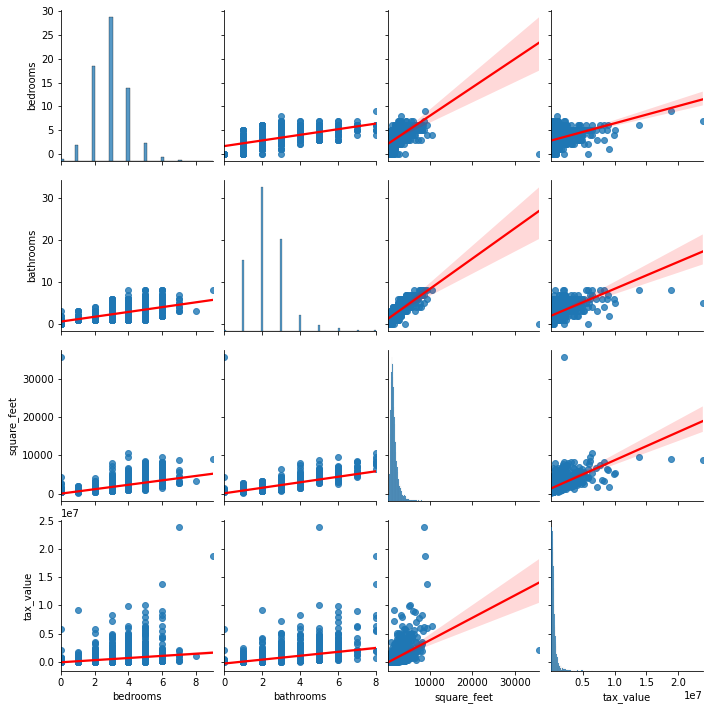

In [10]:
explore.plot_variable_pairs(train)

### Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [11]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    '''
    This function will accept my dataframe 
    and the names of the cols that hold the categorical and continuous features,

    and output 3 different plots for visualizing a categorical var and a continuous var
    '''
    sns.barplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.scatterplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.boxplot(data=df, y=continuous_var, x=categorical_var)

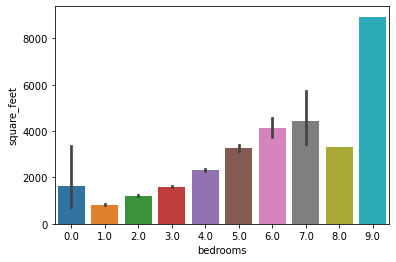

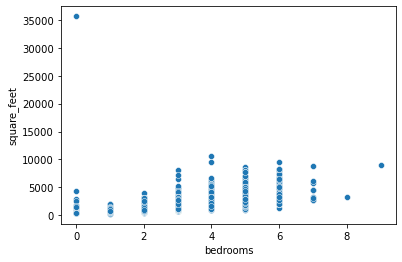

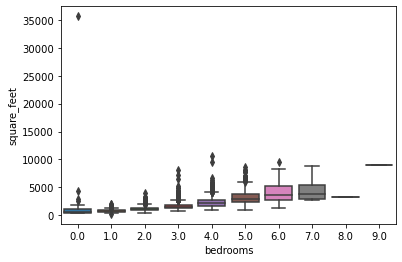

In [12]:
plot_categorical_and_continuous_vars(train, 'bedrooms', 'square_feet')

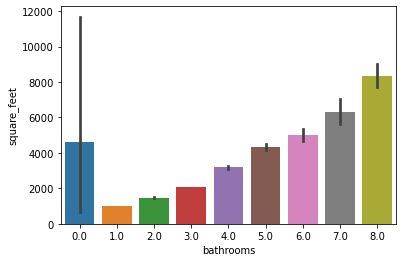

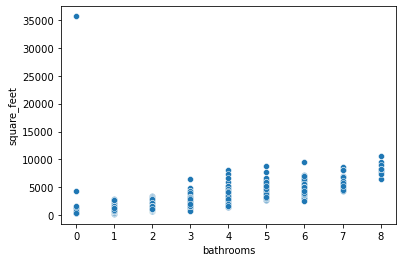

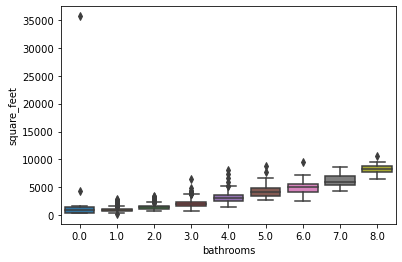

In [13]:
plot_categorical_and_continuous_vars(train, 'bathrooms', 'square_feet')

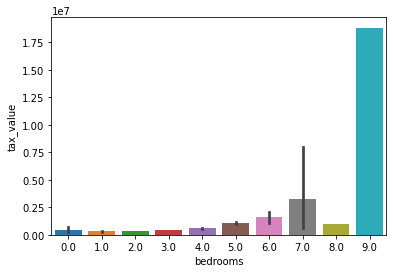

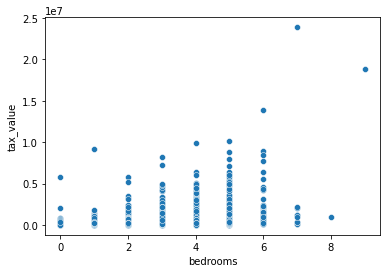

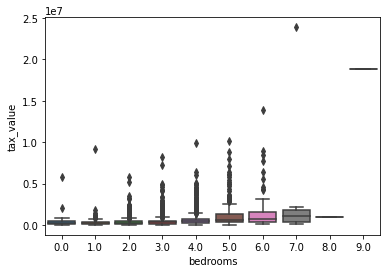

In [14]:
plot_categorical_and_continuous_vars(train, 'bedrooms', 'tax_value')

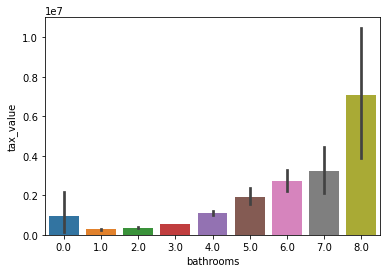

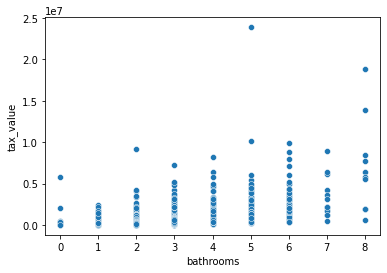

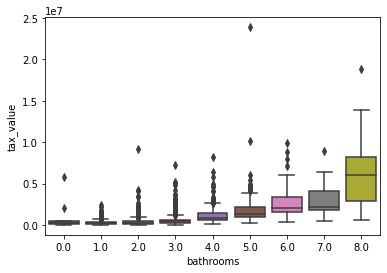

In [15]:
plot_categorical_and_continuous_vars(train, 'bathrooms', 'tax_value')

### Explore your dataset with any other visualizations you think will be helpful.

(0.0, 4.0)

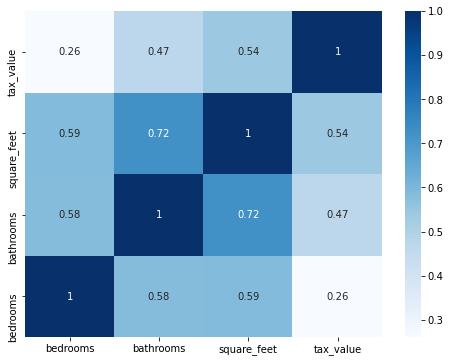

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.ylim(0, 4)